In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
from os import path
import seaborn as sns
#sns.set()
import matplotlib.pyplot as plt


In [11]:
filename = 'dataset_show.h5'
keyname = '10simpleHam_crafted1'
filepath = path.abspath(path.join(path.dirname("createfigures.ipynb"), "..", "..", f"main/data/{filename}"))
# Load a single chunk => much faster
import h5py
f = h5py.File(filepath, 'r')
print([key for key in f.keys()])

['10simpleHam_crafted1', '10simpleHam_crafted_bvar1', '10simpleHam_crafted_cvar1']


In [3]:
dataset = pd.read_hdf(filepath,keyname)
dataset.head()

,dt,steps,stepsCont,delay,frequency,spectralwidth,aFieldStrength,b,c,ODscaler,dim,CoupledHamiltonian,spectrum,optdensity
0,1,4096,28672,2048,190,30,0.01,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[5.05922980347625e-25, 5.078627077633378e-25, ...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
1,1,4096,28672,2048,190,30,0.02,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[7.3791526215685e-24, 7.417416677407065e-24, 7...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
2,1,4096,28672,2048,190,30,0.03,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[3.317803378980075e-23, 3.3377517440740595e-23...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
3,1,4096,28672,2048,190,30,0.04,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[8.791874496460739e-23, 8.856183123684934e-23,...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
4,1,4096,28672,2048,190,30,0.05,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.6679918400803812e-22, 1.684053748997481e-22...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."


In [13]:
z = dataset["aFieldStrength"]
spectras = np.array(dataset["spectrum"].tolist())[:,500:2500]
x = np.arange(0,3276)[500:2500]
y = np.linspace(0.01,1,100)
X,Y = np.meshgrid(x,y)

print(X.shape,Y.shape,spectras.shape)

(100, 2000) (100, 2000) (100, 2000)


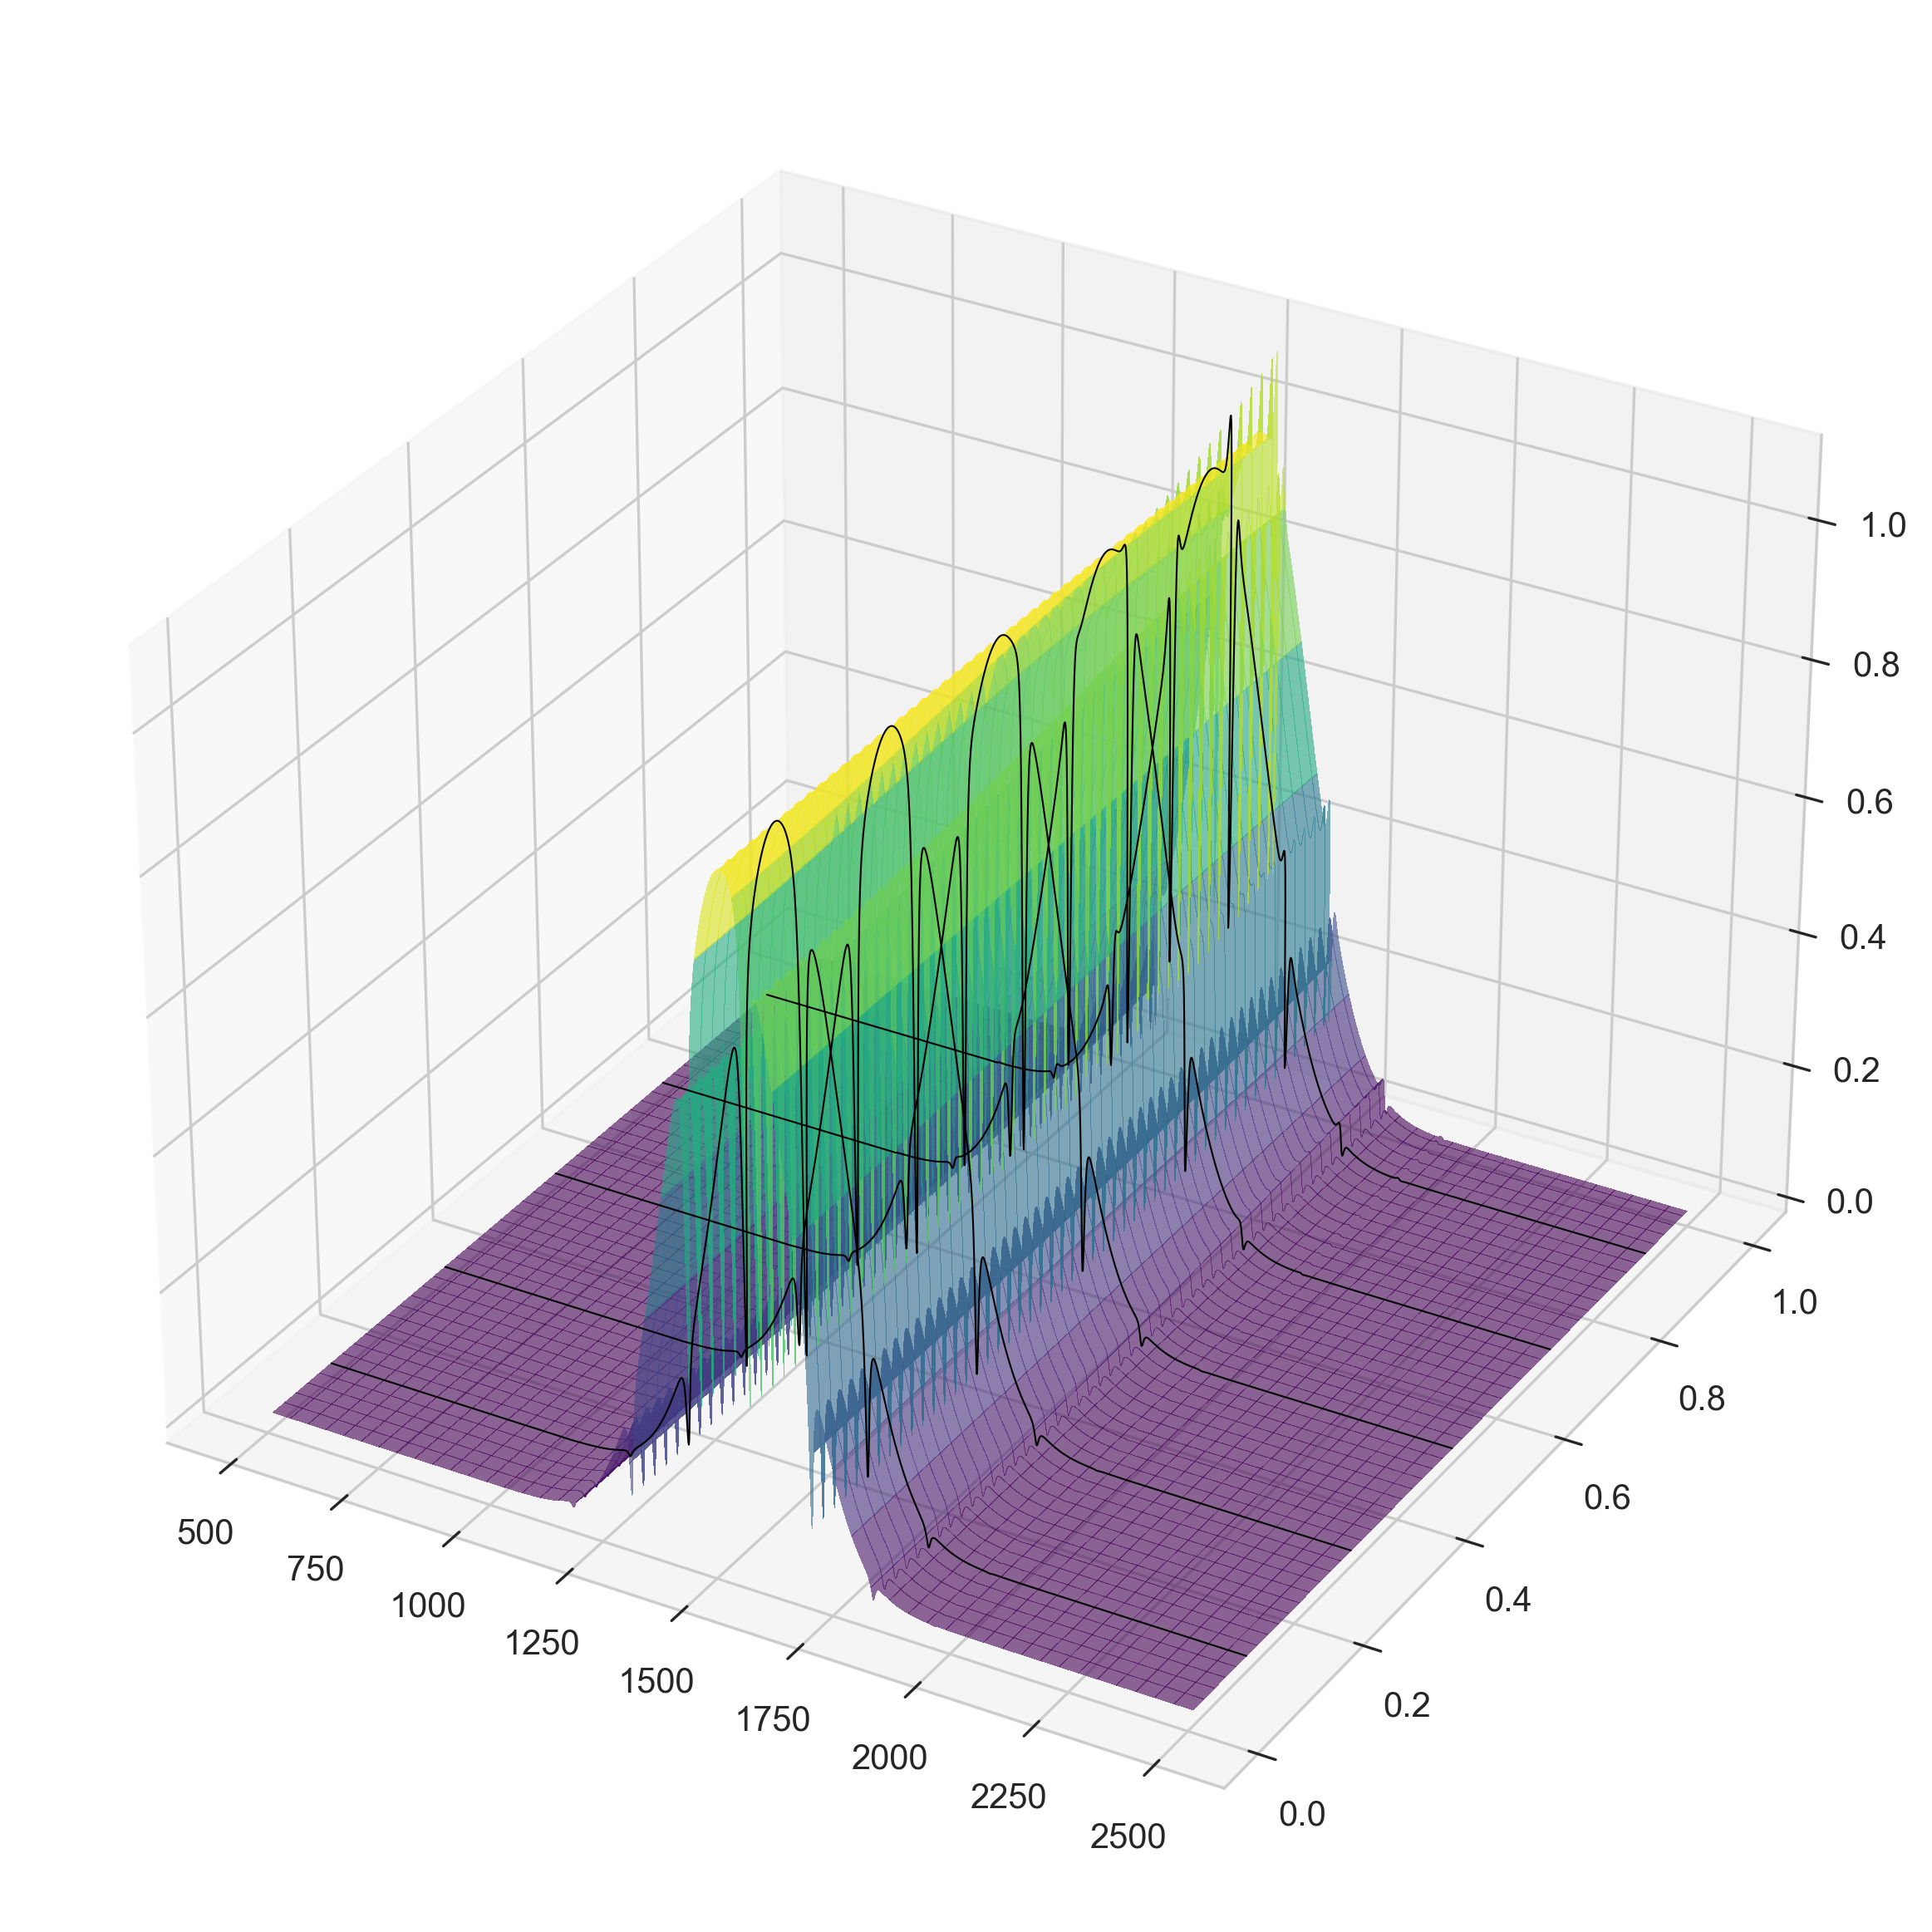

In [14]:
fig = plt.figure(figsize=(10,10),dpi = 300)
ax = fig.add_subplot(111, projection='3d')
n = 5
strengths = np.arange(0,100,n)
for i in range(n):
    i = int((i+1/2)*100/n)
    ax.plot(X[i],Y[i],spectras[i], linewidth=0.5,color='black')
ax.plot_surface(X,Y,spectras,linewidth = 0,cmap = 'viridis' ,alpha = 0.6,antialiased=False)

plt.show()

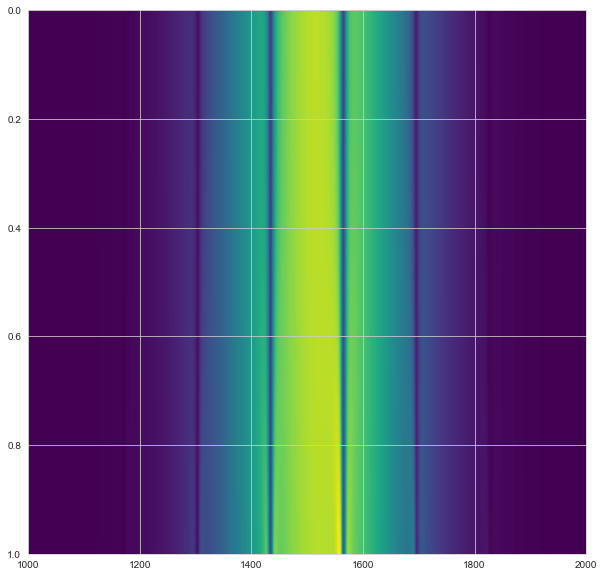

In [15]:
fig = plt.figure(figsize=(10,10))
plt.imshow(spectras[:,500:1500],cmap = 'viridis',aspect='auto',extent=[1000,2000,1,0])
#plt.xlim(0,1);plt.ylim(1000,2000);plt.show()

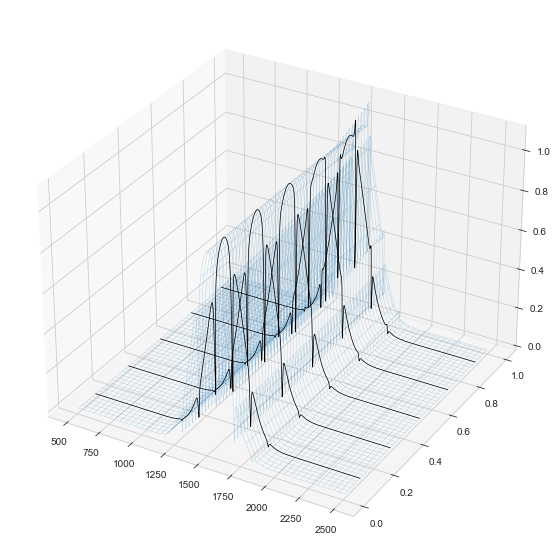

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
n = 5
strengths = np.arange(0,100,n)
for i in range(n):
    i = int((i+1/2)*100/n)
    ax.plot(X[i],Y[i],spectras[i], linewidth=0.7,color='black')
ax.plot_wireframe(X,Y,spectras,linewidth = 0.2,cmap = 'magma' ,alpha = 0.6)

plt.show()